# **4.1  Quem classifica a classe classificadora?** 🔬

**Dupla**:  Ana Luiza Poletto Loss & Júlia Guedes A. dos Santos

**Objetivo**: altere a rede neural feita em Python puro para resolver um problema de classificação. Treine uma rede neural em um dataset simples de classificação para mostrar que funciona.

***

### **Introdução** 🏙️

Neste trabalho, realizamos a adaptação de uma rede neural do tipo MLP (multilayer perceptron) implementada em Python puro, conforme a referência principal [1], para utilizá-la como uma rede classificadora. Uma rede classificadora é um modelo que recebe dados de entrada e os organiza em categorias ou classes. No caso deste projeto, a rede classifica se uma pessoa tem ou não diabetes, atribuindo cada exemplo a uma das duas classes possíveis.

As principais modificações feitas na rede foram aplicar a função sigmoide na saída, utilizar a função de perda binary cross-entropy para calcular o erro, e ajustar o output para que funcione como uma tarefa de classificação binária.

O dataset utilizado foi o conjunto de dados de diabetes disponibilizado no Kaggle, que possui 8 variáveis de entrada (features) e um alvo binário (target), indicando se um paciente tem ou não diabetes. Esse conjunto é bastante utilizado para problemas desse tipo.

A função de perda binary cross-entropy, ou entropia cruzada binária, serve para medir a diferença entre as previsões da rede e os valores reais. Ela se baseia no conceito de entropia, que representa o grau de incerteza ou desordem de um sistema. No contexto do aprendizado de máquina, essa função ajuda a rede a melhorar suas previsões, penalizando mais os erros maiores [2].


### **Importação de bibliotecas** 📚

Em primeiro lugar, precisamos importar as bibliotecas necessárias para a resolução do problema

In [41]:
# Baixar o dataset
import os
import zipfile

#Análise de resultados
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Demais bibliotecas
import random
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler

### **Importação do dataset & Tratamento dos dados** 🎲

O dataset mencionado na introdução pode ser baixado por meio da plataforma Kaggle. Em razão do tamanho da dataset, apenas 200 instâncias aleatórias serão sorteadas para treino, 20 para validação e 20 para teste, utilizando como método o sorteio de indíces aleatórios pelo método randint da biblioteca random.

In [2]:
!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

'kaggle' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [3]:
with zipfile.ZipFile("diabetes-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("diabetes_data")

In [4]:
df = pd.read_csv("diabetes_data/diabetes.csv")
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
idxes_treino = []
while len(idxes_treino) < 200:
    sorteio = random.randint(0, len(df)-1)
    if sorteio not in idxes_treino:
        idxes_treino.append(sorteio)

df_treino = df.iloc[idxes_treino]
display(df_treino)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
363,4,146,78,0,0,38.5,0.520,67,1
660,10,162,84,0,0,27.7,0.182,54,0
274,13,106,70,0,0,34.2,0.251,52,0
97,1,71,48,18,76,20.4,0.323,22,0
...,...,...,...,...,...,...,...,...,...
677,0,93,60,0,0,35.3,0.263,25,0
35,4,103,60,33,192,24.0,0.966,33,0
478,8,126,74,38,75,25.9,0.162,39,0
205,5,111,72,28,0,23.9,0.407,27,0


In [6]:
idxes_validacao = []
while len(idxes_validacao) < 20:
  sorteio = random.randint(0, len(df)-1)
  if sorteio not in idxes_treino and sorteio not in idxes_validacao:
    idxes_validacao.append(sorteio)

df_validacao = df.iloc[idxes_validacao]
display(df_validacao)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
395,2,127,58,24,275,27.7,1.600,25,0
281,10,129,76,28,122,35.9,0.280,39,0
195,5,158,84,41,210,39.4,0.395,29,1
282,7,133,88,15,155,32.4,0.262,37,0
273,1,71,78,50,45,33.2,0.422,21,0
430,2,99,0,0,0,22.2,0.108,23,0
203,2,99,70,16,44,20.4,0.235,27,0
69,4,146,85,27,100,28.9,0.189,27,0
469,6,154,78,41,140,46.1,0.571,27,0
613,6,105,80,28,0,32.5,0.878,26,0


In [7]:
idxes_teste = []
while len(idxes_teste) < 20:
    sorteio = random.randint(0, len(df)-1)
    if (sorteio not in idxes_treino) and (sorteio not in idxes_validacao) and (sorteio not in idxes_teste):
        idxes_teste.append(sorteio)

df_teste = df.iloc[idxes_teste]
display(df_teste)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
731,8,120,86,0,0,28.4,0.259,22,1
405,2,123,48,32,165,42.1,0.520,26,0
394,4,158,78,0,0,32.9,0.803,31,1
578,10,133,68,0,0,27.0,0.245,36,0
546,5,187,76,27,207,43.6,1.034,53,1
288,4,96,56,17,49,20.8,0.340,26,0
479,4,132,86,31,0,28.0,0.419,63,0
359,1,196,76,36,249,36.5,0.875,29,1
745,12,100,84,33,105,30.0,0.488,46,0
567,6,92,62,32,126,32.0,0.085,46,0


A fim de facilitar a manipulação desses dados, os dados serão convertidos em array pelo método values. Além disso, os dados referentes ao target, como precisam ser vetores coluna, passam pela operação com reshape.

In [8]:
X_treino = df_treino.drop(columns=["Outcome"]).values
y_treino = df_treino["Outcome"].values.reshape(-1, 1)

X_validacao = df_validacao.drop(columns=["Outcome"]).values
y_validacao = df_validacao["Outcome"].values.reshape(-1, 1)

X_teste = df_teste.drop(columns=["Outcome"]).values
y_teste = df_teste["Outcome"].values.reshape(-1, 1)

Para garantir que os valores de y não sejam arrays (o que pode prejudicar a propagação desses valores no loop de treinamento, posteriormente), é possível transformá-los em listas.

In [9]:
y_treino = [valor for linha in y_treino for valor in linha]
y_validacao = [valor for linha in y_validacao for valor in linha]
y_teste = [valor for linha in y_teste for valor in linha]

Após converter os datasets para arrays NumPy, é necessário normalizar os dados. Isso porque é amplamente reconhecido que a utilização de dados com escalas distintas pode impactar diretamente o desempenho de redes neurais. Quando uma feature possui uma escala muito maior que as demais, ela tende a exercer uma influência desproporcional na atualização dos pesos durante o treinamento. Dessa forma, o “tamanho” do valor numérico acaba tendo mais relevância do que a real importância da variável, o que pode prejudicar o desempenho do modelo gerado.

Para essa função, o "MinMaxScaler" [Fórmula 1] da biblioteca Scikit-Learn será utilizado.

$$X_c = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$$

<p align="center">
[Fórmula 1: Normalizador por mínimo e máximo]
</p>


Vale ressaltar que aqui os valores referentes aos atributos também são convertidos em listas.

In [10]:
normalizador_X = MinMaxScaler()
X_treino = normalizador_X.fit_transform(X_treino).tolist()
X_validacao = normalizador_X.transform(X_validacao).tolist()
X_teste = normalizador_X.transform(X_teste).tolist()

### **Definição da rede neural** 🧠

Para que a rede possa ser treinada, as classes relacionadas ("Valor", "Neuronio", "Camada" e "MLP") precisam ser definidas.

In [11]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo
        self.grad = 0

    def __repr__(self):
        return f"Valor(data={self.data})"

    
    def __add__(self, outro_valor):
        """Realiza a operação: self + outro_valor."""
        
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data + outro_valor.data
        operador_mae = "+"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_adicao():
            self.grad += resultado.grad
            outro_valor.grad += resultado.grad
            
        resultado.propagar = propagar_adicao
        
        return resultado
    
    def __mul__(self, outro_valor):
        """Realiza a operação: self * outro_valor."""
        
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data * outro_valor.data
        operador_mae = "*"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_multiplicacao():
            self.grad += resultado.grad * outro_valor.data 
            outro_valor.grad += resultado.grad * self.data
            
        resultado.propagar = propagar_multiplicacao
        
        return resultado
    
    def exp(self):
        """Realiza a operação: exp(self)"""
        progenitor = (self, )
        data = math.exp(self.data)
        operador_mae = "exp"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_exp():
            self.grad += resultado.grad * data 
        
        resultado.propagar = propagar_exp
        
        return resultado

    def log(self):
        progenitor = (self,)
        if self.data > 0:
            data = math.log(self.data)
        else:
            data = 0

        operador_mae = "log"
        resultado = Valor(data, progenitor, operador_mae)

        def propagar_log():
            # O gradiente correto de log(x) é 1/x
            self.grad += resultado.grad * (1 / self.data)

        resultado.propagar = propagar_log

        return resultado

    
    def __pow__(self, expoente):
        """Realiza a operação: self ** expoente"""
        assert isinstance(expoente, (int, float))
        progenitor = (self, )
        data = self.data ** expoente
        operador_mae = f"**{expoente}"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_pow():
            self.grad += resultado.grad * (expoente * self.data ** (expoente - 1))
        
        resultado.propagar = propagar_pow
        
        return resultado
    
    def __truediv__(self, outro_valor):
        """Realiza a operação: self / outro_valor"""
        return self * outro_valor ** (-1)
    
    def __neg__(self):
        """Realiza a operação: -self"""
        return self * -1
    
    def __sub__(self, outro_valor):
        """Realiza a operação: self - outro_valor"""
        return self + (-outro_valor)
    
    def __radd__(self, outro_valor):
        """Realiza a operação: outro_valor + self"""
        return self + outro_valor
    
    def __rsub__(self, outro_valor):
        """Realiza a operação: outro_valor - self"""
        return self - outro_valor
    
    def __rmul__(self, outro_valor):
        """Realiza a operação: outro_valor * self"""
        return self * outro_valor
    
    def sig(self):                          
        """Realiza a operação: exp(self) / (exp(self) + 1)"""
        return self.exp() / (self.exp() + 1)
    
    def relu(self):
        """Realiza a operação: np.maximum(0, self.data)"""
        progenitor = (self,)
        data = np.maximum(0, self.data)
        operador_mae = f"max(0, {self.data})"
        resultado = Valor(data, progenitor, operador_mae)

        def propagar_relu():
            # O gradiente é 1 quando self.data > 0, caso contrário é 0
            self.grad += resultado.grad * (1 if self.data > 0 else 0)

        resultado.propagar = propagar_relu

        return resultado
    
    def propagar(self):
        pass
    
    def propagar_tudo(self):
        
        self.grad = 1
        
        ordem_topologica = []
        
        visitados = set()

        def constroi_ordem_topologica(v):
            if v not in visitados:
                visitados.add(v)
                for progenitor in v.progenitor:
                    constroi_ordem_topologica(progenitor)
                ordem_topologica.append(v)

        constroi_ordem_topologica(self)
        
        for vertice in reversed(ordem_topologica):
            vertice.propagar()

In [27]:
class Neuronio:
    def __init__(self, num_dados_entrada):
        #print(num_dados_entrada)
        self.vies = Valor(random.uniform(-1, 1))
        
        self.pesos = []
        for i in range(num_dados_entrada):
            self.pesos.append(Valor(random.uniform(-1, 1)))
            
    def __call__(self, x):
        
        print(len(x), print(len(self.pesos)))
        
        assert len(x) == len(self.pesos)
        
        soma = 0
        for info_entrada, peso_interno in zip(x, self.pesos):
            soma += info_entrada * peso_interno
            
        soma += self.vies  
        dado_de_saida = soma.sig()
        
        return dado_de_saida       
    
    def parametros(self):
        return self.pesos + [self.vies]

In [13]:
class Camada:
    def __init__(self, num_neuronios, num_dados_entrada):
        neuronios = []
        
        for _ in range(num_neuronios):

            neuronio = Neuronio(num_dados_entrada) 
            neuronios.append(neuronio)
            
        self.neuronios = neuronios     
        
    def __call__(self, x): 
        dados_de_saida = []
        
        for neuronio in self.neuronios:
            informacao = neuronio(x)
            dados_de_saida.append(informacao) 
            
        if len(dados_de_saida) == 1:
            return dados_de_saida[0] 
        else:        
            return dados_de_saida  
    
    def parametros(self):
        params = []
        
        for neuronio in self.neuronios:
            params_neuronio = neuronio.parametros()
            params.extend(params_neuronio)
        
        return params

In [14]:
class MLP:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):
        
        percurso = [num_dados_entrada] + num_neuronios_por_camada
        
        camadas = []
        
        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(num_neuronios_por_camada[i], percurso[i])
            camadas.append(camada)
            
        self.camadas = camadas
        
    def __call__(self, x):
        for camada in self.camadas:
            x = camada(x)
        #print(x)
        return x 
    
    def parametros(self):
        params = []
        
        for camada in self.camadas:
            parametros_camada = camada.parametros()
            params.extend(parametros_camada)
            
        return params

Com as classes definidas, é possível estabelecer a arquitetura. Nesse caso, a rede será composta por três camadas ocultas com, respectivamente, 8, 4 e 2 neurônios e uma camada de saída com apenas uma unidade de processamento. Isso porque, apesar de ser um problema de classificação, por se tratar de um problema binário, o resultado pode ser expresso por um valor dentro do intervalo entre 0 e 1. Caso esse valor seja menor do que 0.5, ele pertencerá a classe de rótulo 0, caso seja maior, a classe de rótulo 1. Por fim, o número de dados de entrada é referente a quantidade de features utilizada.

In [15]:
NUM_DADOS_DE_ENTRADA = 8
NUM_DADOS_DE_SAIDA = 1
CAMADAS_OCULTAS = [16, 8, 4]

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]

mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

No contexto de problemas de classificação, é apropriado utilizar a função de entropia cruzada para o cálculo do erro. Essa função, inspirada no conceito de entropia da termodinâmica — que mede o grau de desordem de um sistema — quantifica o quão distantes estão as previsões em relação aos rótulos reais. Para problemas de classificação binária, como o abordado neste trabalho, utiliza-se a versão binária da entropia cruzada [Fórmula 2].

$$
L = - \frac{1}{N}[\sum_{j=1}^N [t_j log(p_j) + (1 - t_j) log(1-p_j)]]
$$

In [16]:
def bin_cross_entropy(y_true, y_pred):
    soma = Valor(0)            
    for yt, yp in zip(y_true, y_pred):

        termo1 = yp.log() * yt
        termo2 = (Valor(1) - yp).log() * (1 - yt)
        soma = soma + (termo1 + termo2)
    loss = soma * (-1) / len(y_true)
    return loss  

Finalmente, para o loop de aprendizado, serão definidas 100 épocas e uma taxa de aprendizado de 0.1. A fim de analisar os resultados, os dados referentes a loss de treino e validação de cada época serão armazenadas em uma lista, para que a curva de aprendizado possa ser plotada.

In [17]:
NUM_EPOCAS = 100
TAXA_DE_APRENDIZADO = 0.1
resultado_loss_treino = []
resultado_loss_validacao = []

for epoca in range(NUM_EPOCAS):
    # Forward pass
    y_pred_treino = []
    for exemplo in X_treino:
        previsao = mlp(exemplo)    
        y_pred_treino.append(previsao)
    
    # Cálculo da perda
    loss_treino = bin_cross_entropy(y_treino, y_pred_treino)
    resultado_loss_treino.append(loss_treino.data)  # Armazena o valor numérico da loss

    # Zera gradientes 
    for p in mlp.parametros():
        p.grad = 0
        
    # Backpropagation
    loss_treino.propagar_tudo()  
    for p in mlp.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    # Previsão do conjunto de validação
    y_pred_validacao = []
    for exemplo in X_validacao:
        previsao = mlp(exemplo)
        y_pred_validacao.append(previsao)
    loss_validacao = bin_cross_entropy(y_validacao, y_pred_validacao)
    resultado_loss_validacao.append(loss_validacao.data)

    # Log de progresso
    print(f"Época {epoca+1}: loss de treino = {loss_treino.data:.4f} | loss de validação = {loss_validacao.data:.4f}")


Época 1: loss de treino = 0.7073 | loss de validação = 0.7092
Época 2: loss de treino = 0.7021 | loss de validação = 0.7014
Época 3: loss de treino = 0.6973 | loss de validação = 0.6942
Época 4: loss de treino = 0.6929 | loss de validação = 0.6874
Época 5: loss de treino = 0.6889 | loss de validação = 0.6811
Época 6: loss de treino = 0.6852 | loss de validação = 0.6752
Época 7: loss de treino = 0.6818 | loss de validação = 0.6697
Época 8: loss de treino = 0.6787 | loss de validação = 0.6645
Época 9: loss de treino = 0.6759 | loss de validação = 0.6597
Época 10: loss de treino = 0.6733 | loss de validação = 0.6552
Época 11: loss de treino = 0.6709 | loss de validação = 0.6510
Época 12: loss de treino = 0.6687 | loss de validação = 0.6471
Época 13: loss de treino = 0.6668 | loss de validação = 0.6434
Época 14: loss de treino = 0.6650 | loss de validação = 0.6400
Época 15: loss de treino = 0.6633 | loss de validação = 0.6368
Época 16: loss de treino = 0.6618 | loss de validação = 0.6338
É

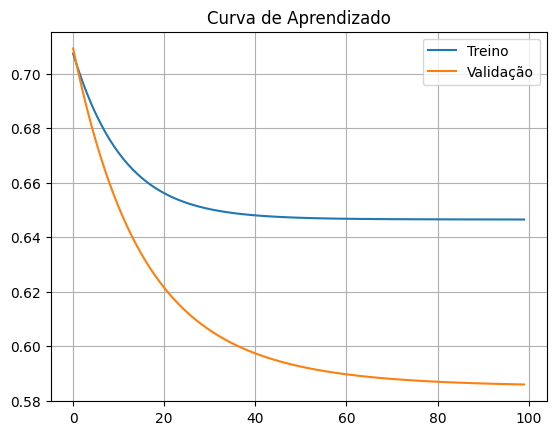

In [18]:
plt.plot(resultado_loss_treino, label="Treino")
plt.plot(resultado_loss_validacao, label="Validação")
plt.title("Curva de Aprendizado")
plt.legend()
plt.grid()

A partir da curva de aprendizado, é possível notar que a perda do conjunto de validação foi menor do que a perda dos dados de treino. Isso é um bom indicativo de que o modelo não se sobreajustou aos dados, ou seja, conseguiu ser geral o bastante para ser capaz de prever dados desconhecidos. A fim de verificar o desempenho do modelo, ainda é possível testar o desempenho do conjunto de teste. 

In [30]:
y_pred_teste = []

In [31]:
for exemplo in X_teste:
    previsao = mlp(exemplo)    
    y_pred_teste.append(previsao)

In [34]:
y_real = [1 if i > 0.5 else 0 for i in y_teste]

In [37]:
y_pred = [1 if i.data > 0.5 else 0 for i in y_pred_teste]

Acurácia = 60.00%


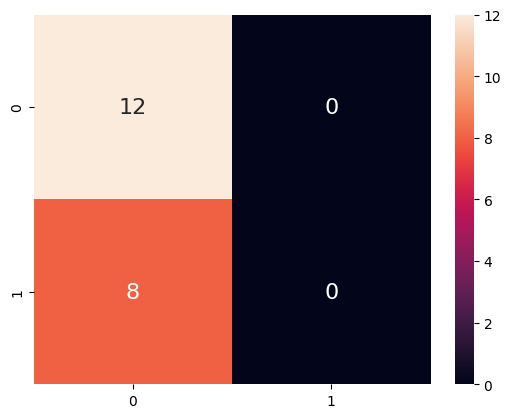

In [44]:
acuracia = accuracy_score(y_real, y_pred)

print(f"Acurácia = {(acuracia*100):.2f}%")

ordem_labels = [0, 1]

matriz_conf = confusion_matrix(y_real, y_pred, labels=ordem_labels)
df_conf = pd.DataFrame(matriz_conf, ordem_labels, ordem_labels)
sns.heatmap(df_conf, annot=True, annot_kws={"size": 16});

A partir da análise do resultado da matriz de confusão, é possível observar que a rede apresentou o desempenho de um modelo baseline: sendo apenas capaz de prever uma classe (mais frequente). Em razão disso, o modelo apresentou uma acurácia de 60%.

### **Conclusão** 😁

Ao final, foi possível concluir que a adaptação da MLP regressora para uma classificadora binária foi bem-sucedida. Apesar do resultado inesperado, com o comportamento da rede sendo equivalente a de um modelo baseline, a atividade foi útil para o aprendizado de técnicas relativas a esse tipo de modelo, como a implementação da função de custo *Binary Cross Entropy* (em português, entropia cruzada binária) e a representação de classes por meio de probabilidades expressas na saída de neurônios. Como perspectivas futuras, uma otimização de hiperparâmetros poderia ser realizada a fim de melhorar o desempenho do modelo.

### **Referências** 🗃️

[1] Referência Principal (construção da rede neural em Python puro): Andrej Karpathy. The spelled-out intro to neural networks and backpropagation: building micrograd (2022). https://www.youtube.com/watch?v=VMj-3S1tku0

[2] PARTNER, IPNET Growth. A importância da normalização e padronização dos dados em Machine Learning. Disponível em: <https://medium.com/ipnet-growth-partner/padronizacao-normalizacao-dados-machine-learning-f8f29246c12>. Acesso em: 12 abr. 2025.
